In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

In [2]:
np.random.seed(42)
size = np.random.normal(1500, 300, 100)  # house sizes in sq ft
price = size * 200 + np.random.normal(0, 20000, 100)  # house prices in $

In [3]:
# Add some outliers
size = np.append(size, [4000, 4200, 4500])
price = np.append(price, [900000, 1000000, 1100000])

In [4]:
# Create DataFrame
df = pd.DataFrame({'Size': size, 'Price': price})

In [5]:
df.head()

,Size,Price
0,1649.014246,301495.434340
1,1458.520710,283291.235474
2,1694.306561,332007.021956
3,1956.908957,375336.246000
4,1429.753988,282725.083283


In [7]:
df.shape

(103, 2)

In [8]:
Q1 = df['Price'].quantile(0.25)
Q3 = df['Price'].quantile(0.75)
IQR = Q3 - Q1

In [9]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


In [10]:
# Filter out the outliers
df_clean = df[(df['Price'] >= lower_bound) & (df['Price'] <= upper_bound)]

In [11]:
# Step 2: Linear Regression
# -------------------------------------
X = df_clean[['Size']]
y = df_clean['Price']


In [12]:
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [13]:
# Predictions
y_pred = model.predict(X)

In [14]:
print("R² Score:", r2_score(y, y_pred))
print("Mean Squared Error:", mean_squared_error(y, y_pred))

R² Score: 0.8739636663525951
Mean Squared Error: 356973440.64341915


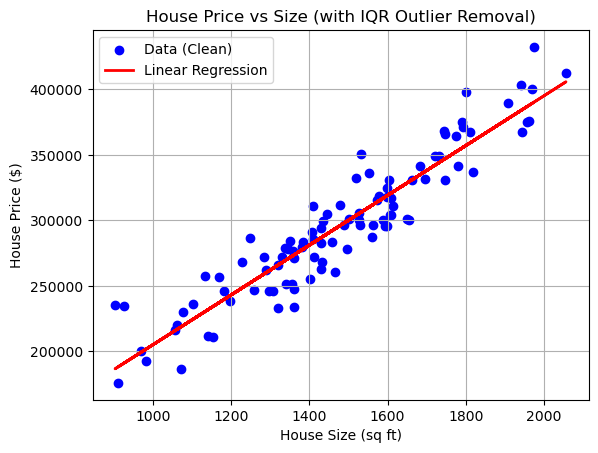

In [15]:
plt.scatter(df_clean['Size'], df_clean['Price'], color='blue', label='Data (Clean)')
plt.plot(df_clean['Size'], y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('House Size (sq ft)')
plt.ylabel('House Price ($)')
plt.title('House Price vs Size (with IQR Outlier Removal)')
plt.legend()
plt.grid(True)
plt.show()